### Data Formatting (make statistical analysis easier)

- Data is usually collected from different places and stored in different formats
- Bringing data a common standard of expression allows users to make meaningful comparison

as a part of data set cleaning data formating ensure the data is consistent and easily understandable

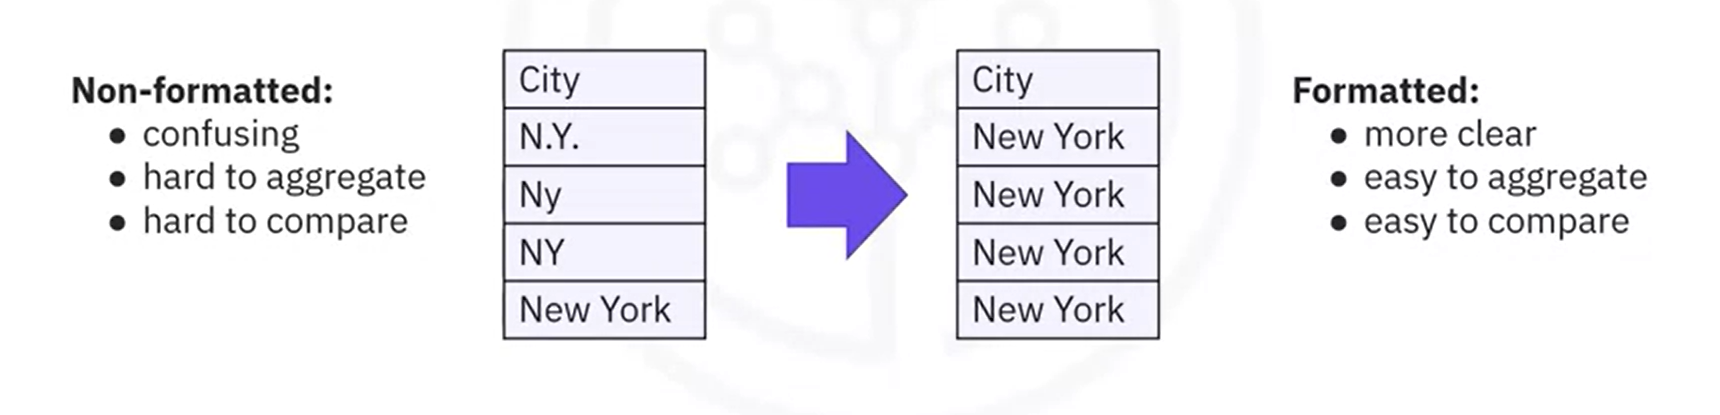

Note: 
- Sometimes this unclean data is a good thing to see
- for eg 
    - different ways prople write NEW YORK
    - looking wants to spot fraud

### Applying calculations to an entire column
- Convert "mpg" to "L/100km: in car dataset
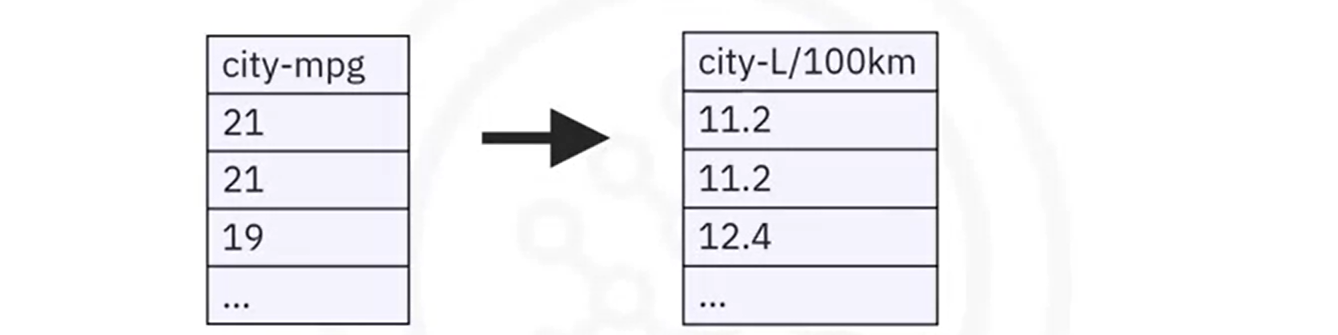
- `df["city-mpg"] = 235/df["city-mpg]`
- `df.rename(columns = {"city_mpg": "city-L/100km"}, implace=True)`

In [121]:
import pandas as pd
import numpy as np

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
           "engine-location", "wheel-base","length","width","height", "curb-weight", "engine-type", "num-of-cylinders",
           "engine-size","fuel-system","bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
           "highway-mpg","price"]

df = pd.read_csv("../data/automobile.csv")

df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [105]:
df.replace("?",np.nan, inplace=True)
city_mean = df["city-mpg"].mean()
df["city-mpg"].replace(np.nan, city_mean)
# df["price"].mean()

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [106]:
df["city-mpg"] = 235/df["city-mpg"]

df.rename(columns = {"city-mpg": "city-L/100km"}, inplace=True)

df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-mpg', 'price'],
      dtype='object')

In [155]:
df["city-mpg"].dtypes()

TypeError: 'numpy.dtypes.Int64DType' object is not callable

In [118]:
df.columns["city-L/100km"]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Incorrect data type

- Sometimes the wrong data typ is assigned to a feature
- assinged data type of price is Object 
- should really be an integer or float type
- it important to explore feature's data type and convert them to correct data types.
- otherwise, the developed models later on may behave stangly

In [88]:
df["price"].tail(5)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

### Data types in pandas
- There are many data types in pandas
- Objects: "A", "Hello" ...
- Int64: 1,3,5
- Float64: 2.123, 632.31, 0.12


### Correcting data types
To identify data types
- Use `dataframe.dtypes()` to identify data type 
    - to check data type of each variable in a data frame.
- To convert data types:
     - Use `dataframe.astype() ` to convert data type

Example: Convert data type to integer in column "price"
 `df["price"] = df["price"].astype("int")`

In [159]:
df["price"] = df["price"].astype(np.uint8)

ValueError: invalid literal for int() with base 10: '?'